this is some text

In [9]:
from selenium import webdriver
from bs4 import BeautifulSoup as bs
import time
import re
from urllib.request import urlopen
import json
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np

In [10]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

class InstagramBot():
    def __init__(self, email, password):
        self.browser = webdriver.Chrome()
        self.email = email
        self.password = password

    def signIn(self):
        self.browser.get('https://www.instagram.com/accounts/login/')
        time.sleep(1)
        emailInput = self.browser.find_elements_by_css_selector('form input')[0]
        passwordInput = self.browser.find_elements_by_css_selector('form input')[1]

        try:
            emailInput.send_keys(self.email)
            passwordInput.send_keys(self.password)
            passwordInput.send_keys(Keys.ENTER)
            time.sleep(2)
        except:
            print("Error with user: " + self.email)
            sys.exit(1)
        
    def not_now(self):
        self.browser.find_element_by_xpath('//button[text()="Not Now"]').click()

    def getUserFollowers(self, username, max, textfile):
        self.browser.get('https://www.instagram.com/' + username)
        followersLink = self.browser.find_element_by_css_selector('ul li a')
        followersLink.click()
        time.sleep(2)
        followersList = self.browser.find_element_by_css_selector('div[role=\'dialog\'] ul')
        numberOfFollowersInList = len(followersList.find_elements_by_css_selector('li'))
    
        followersList.click()
        actionChain = webdriver.ActionChains(self.browser)
        while (numberOfFollowersInList < max):
            actionChain.key_down(Keys.SPACE).key_up(Keys.SPACE).perform()
            time.sleep(0.5)
            numberOfFollowersInList = len(followersList.find_elements_by_css_selector('li'))
        
        followers = []
        for user in followersList.find_elements_by_css_selector('li'):
            userLink = user.find_element_by_css_selector('a').get_attribute('href')
            print(userLink)
            followers.append(userLink)
            if (len(followers) == max):
                break
        
        with open(textfile, 'w') as f:
            for follower in followers:
                f.write(follower[len('https://www.instagram.com/'):-1] +  "\n")
        return followers

    def closeBrowser(self):
        self.browser.close()

    def __exit__(self, exc_type, exc_value, traceback):
        self.closeBrowser()
        
#bot = InstagramBot('sejaldua@gmail.com', 'Sejalu99')
#bot.signIn()

In [11]:
bot = InstagramBot('camillebowman', 'neural19')
bot.signIn()
bot.not_now()
followers = bot.getUserFollowers('camillebowman', 1500, 'camille_followers.txt')
print(followers)

SessionNotCreatedException: Message: session not created: This version of ChromeDriver only supports Chrome version 76


In [16]:
import itertools

from explicit import waiter, XPATH
from selenium import webdriver


def login(driver):
    username = ""  # <username here>
    password = ""  # <password here>

    # Load page
    driver.get("https://www.instagram.com/accounts/login/")

    # Login
    waiter.find_write(driver, "//div/input[@name='username']", username, by=XPATH)
    waiter.find_write(driver, "//div/input[@name='password']", password, by=XPATH)
    waiter.find_element(driver, "//div/button[@type='submit']", by=XPATH).click()

    # Wait for the user dashboard page to load
    waiter.find_element(driver, "//a/span[@aria-label='Find People']", by=XPATH)


def scrape_followers(driver, account):
    # Load account page
    driver.get("https://www.instagram.com/{0}/".format(account))

    # Click the 'Follower(s)' link
    # driver.find_element_by_partial_link_text("follower").click()
    waiter.find_element(driver, "//a[@href='/instagram/followers/']", by=XPATH).click()

    # Wait for the followers modal to load
    waiter.find_element(driver, "//div[@role='dialog']", by=XPATH)

    # At this point a Followers modal pops open. If you immediately scroll to the bottom,
    # you hit a stopping point and a "See All Suggestions" link. If you fiddle with the
    # model by scrolling up and down, you can force it to load additional followers for
    # that person.

    # Now the modal will begin loading followers every time you scroll to the bottom.
    # Keep scrolling in a loop until you've hit the desired number of followers.
    # In this instance, I'm using a generator to return followers one-by-one
    follower_css = "ul div li:nth-child({}) a.notranslate"  # Taking advange of CSS's nth-child functionality
    for group in itertools.count(start=1, step=12):
        for follower_index in range(group, group + 12):
            yield waiter.find_element(driver, follower_css.format(follower_index)).text

        # Instagram loads followers 12 at a time. Find the last follower element
        # and scroll it into view, forcing instagram to load another 12
        # Even though we just found this elem in the previous for loop, there can
        # potentially be large amount of time between that call and this one,
        # and the element might have gone stale. Lets just re-acquire it to avoid
        # that
        last_follower = waiter.find_element(driver, follower_css.format(follower_index))
        driver.execute_script("arguments[0].scrollIntoView();", last_follower)


if __name__ == "__main__":
    account = 'instagram'
    driver = webdriver.Chrome()
    try:
        login(driver)
        # Print the first 75 followers for the "instagram" account
        print('Followers of the "{}" account'.format(account))
        for count, follower in enumerate(scrape_followers(driver, account=account), 1):
            print("\t{:>3}: {}".format(count, follower))
            if count >= 75:
                break
    finally:
        driver.quit()

SessionNotCreatedException: Message: session not created: This version of ChromeDriver only supports Chrome version 76


2019-09-21


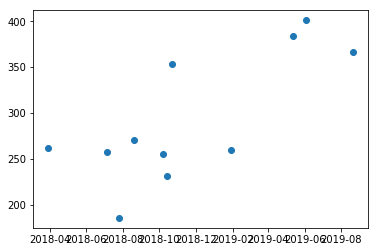

In [51]:
import json
import re
from datetime import date
import time
import dateutil.parser
import matplotlib.pyplot as plt


now = date.fromtimestamp(time.time())
print(now)

filename = "profiles/sejaldua99_2019-09-21 11-18-04.json"
filename = "profiles/rahul_dua2_2019-09-21 12-02-48.json"
#Read JSON data into the datastore variable
if filename:
    with open(filename, 'r') as f:
        datastore = json.load(f)

#Use the new datastore datastructure
dates = [datastore['posts'][i]['date'] for i in range(len(datastore['posts']))]
converted_dates = [dateutil.parser.parse(dates[i]) for i in range(len(dates))]
likes = [datastore['posts'][i]['likes']['count'] for i in range(len(datastore['posts']))]

plt.scatter(converted_dates, likes)
    

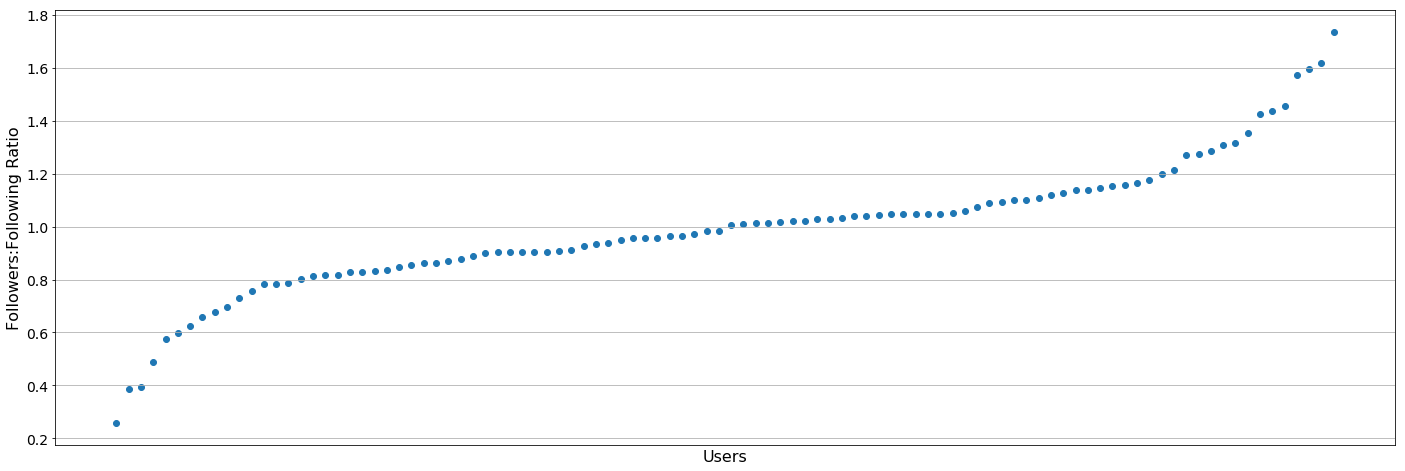

In [108]:
import json
import re
from datetime import date
import time
import dateutil.parser
import matplotlib.pyplot as plt
import os

followers = []
following = []
users = []

json_files = [pos_json for pos_json in os.listdir('profiles/') if pos_json.endswith('.json')]
#Read JSON data into the datastore variable
for filename in json_files:
    with open('profiles/' + filename, 'r') as f:
        datastore = json.load(f)

        
    #Use the new datastore datastructure
    users.append(datastore['username'])
    followers.append(datastore['followers']['count'])
    following.append(datastore['following']['count'])

ratios = [followers[i] / following[i] for i in range(len(users))]
Z = [x for _,x in sorted(zip(ratios,users))]
W = [y for y,_ in sorted(zip(ratios,users))]
fig = plt.figure(figsize = (24, 8))
plt.scatter(Z[0:-1], W[0:-1]);
plt.xticks([])
plt.grid()
plt.ylabel('Followers:Following Ratio', fontsize=16)
plt.yticks(fontsize=14)
plt.xlabel('Users', fontsize=16)
fig.savefig('ratiograph.jpg')

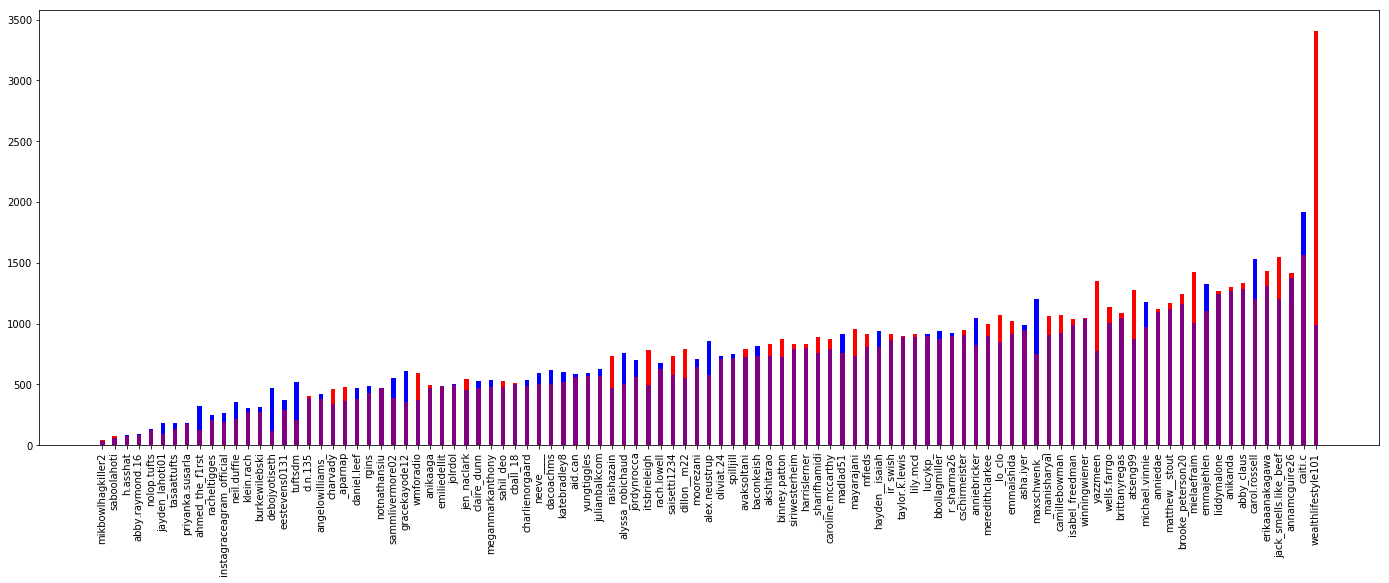

In [109]:
blue = []
red = []
purple = []
totals = [followers[i] + following[i] for i in range(len(users))]
sorted_users = [x for _,_,_,x in sorted(zip(totals,followers,following,users))]
followers = [x for _,x,_,_ in sorted(zip(totals, followers,following, users))]
following = [x for _,_,x,_ in sorted(zip(totals, followers, following, users))]
for i in range(len(sorted_users)):
    if followers[i] > following[i]:
        blue.append(0)
        purple.append(following[i])
        red.append(followers[i]-following[i])
    else:
        red.append(0)
        purple.append(followers[i])
        blue.append(abs(followers[i]-following[i]))

width = 0.35 
fig = plt.figure(figsize=(24,8))
p1 = plt.bar(sorted_users, purple, width, color='purple')
p2 = plt.bar(sorted_users, blue, width, bottom=purple, color='blue')
p3 = plt.bar(sorted_users, red, width, bottom=purple, color='red')
plt.xticks(rotation=90)
plt.show()
# plt.ylabel('Scores')
# plt.title('Scores by group and gender')
# plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
# plt.yticks(np.arange(0, 81, 10))
# plt.legend((p1[0], p2[0]), ('Men', 'Women'))

In [56]:
import requests
location_id = '235898755'
url = 'https://www.instagram.com/explore/locations/' + location_id + '/?__a=1'
print(len(location_id))
response = requests.get(url)
print(response)
if 'json' in response.headers.get('Content-Type'):
    js = response.json()
else:
    print('Response content is not in JSON format.')
    js = json.loads(response.text)
# with open(response, 'r') as f:
#     data = json.loads(f.read())
# lat = data['graphql']['location']['lat']
# print("latitude", lat)
# lng = data['graphql']['location']['lng']
# print("longitude", lng)

9
<Response [200]>
Response content is not in JSON format.


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [28]:
import csv
csv_file = 'camillebowman_followers.csv'
txt_file = 'camille_followers.txt'
with open(txt_file, "w") as my_output_file:
    with open(csv_file, "r") as my_input_file:
        i = 0
        for row in csv.reader(my_input_file):
            if i % 2 == 0:
                my_output_file.write(''.join(row) + '\n')
            i += 1
    my_output_file.close()